In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os
print(os.listdir("input"))

['en_sample_submission.csv', 'en_sample_submission_2.csv', 'en_test.csv', 'en_test_2.csv', 'en_train.csv']


In [3]:
# Training Data
training_data = pd.read_csv("input/en_train.csv")

In [4]:
max_data_size = len(training_data)
training_data['class'].unique()

array(['PLAIN', 'PUNCT', 'DATE', 'LETTERS', 'CARDINAL', 'VERBATIM',
       'DECIMAL', 'MEASURE', 'MONEY', 'ORDINAL', 'TIME', 'ELECTRONIC',
       'DIGIT', 'FRACTION', 'TELEPHONE', 'ADDRESS'], dtype=object)

In [5]:
max_data_size

9918441

In [6]:
training_data.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918441 entries, 0 to 9918440
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   sentence_id  int64 
 1   token_id     int64 
 2   class        object
 3   before       object
 4   after        object
dtypes: int64(2), object(3)
memory usage: 378.4+ MB


<AxesSubplot:xlabel='class', ylabel='count'>

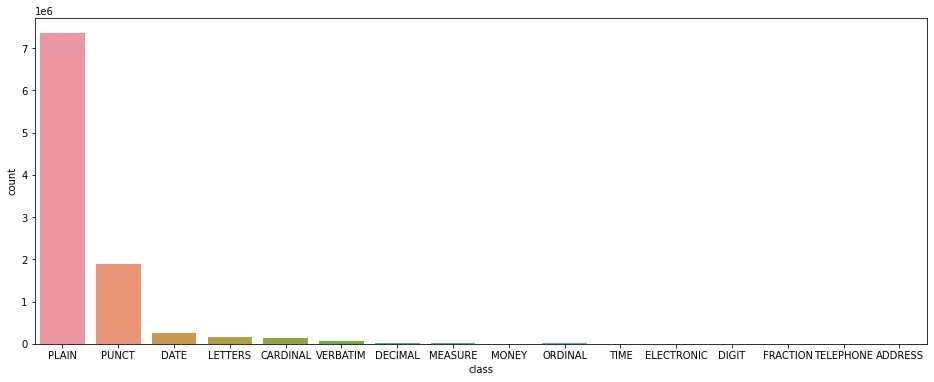

In [8]:
fig = plt.figure(figsize=(16,6))
sns.countplot(x='class',data = training_data)

In [9]:
training_data['class'].value_counts().sort_values(ascending = False)

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64

In [16]:
len(training_data['class'].unique())

16

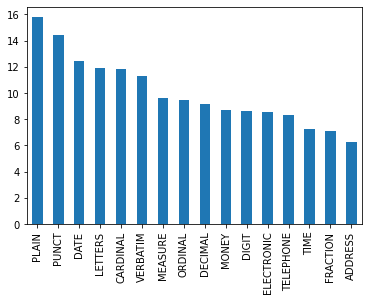

In [17]:
np.log(training_data['class'].value_counts()).plot(kind='bar')
plt.show()

In [10]:
training_data.isnull().any()

sentence_id    False
token_id       False
class          False
before          True
after           True
dtype: bool

In [13]:
training_data['before'].isnull().sum()

74

In [15]:
(training_data[training_data['before'].isnull()]).head(10)

,sentence_id,token_id,class,before,after
584464,46722,18,PLAIN,NaN,NaN
616107,49226,17,LETTERS,NaN,n a
684691,54634,1,PLAIN,NaN,NaN
747949,59607,5,PLAIN,NaN,NaN
965529,76612,7,PLAIN,NaN,NaN
1011291,80126,5,LETTERS,NaN,n a
1347924,106058,6,PLAIN,NaN,NaN
1707272,133562,10,PLAIN,NaN,NaN
1909700,149031,16,PLAIN,NaN,NaN
1999090,155865,4,PLAIN,NaN,NaN


In [12]:
training_data.describe()

,sentence_id,token_id
count,9.918441e+06,9.918441e+06
mean,3.778565e+05,7.519584e+00
std,2.151371e+05,6.117934e+00
min,0.000000e+00,0.000000e+00
25%,1.925260e+05,3.000000e+00
50%,3.792590e+05,6.000000e+00
75%,5.641890e+05,1.100000e+01
max,7.480650e+05,2.550000e+02


In [40]:
train_sent = training_data.groupby("sentence_id")["sentence_id"].count()
train_sent.describe()

count    748066.000000
mean         13.258778
std           6.071624
min           2.000000
25%           8.000000
50%          13.000000
75%          18.000000
max         256.000000
Name: sentence_id, dtype: float64

In [41]:
train_token = training_data.groupby("token_id")["token_id"].count()
train_token.describe()

count       256.000000
mean      38743.910156
std      141987.238258
min           1.000000
25%           2.000000
50%          16.000000
75%         163.500000
max      748066.000000
Name: token_id, dtype: float64

In [34]:
num_train_sent = len(training_data.sentence_id.unique())
num_train_sent

748066

In [35]:
num_train_token = len(training_data.token_id.unique())
num_train_token

256

In [18]:
training_data[training_data['class']=='PLAIN'].head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [19]:
training_data[training_data['class']=='PUNCT'].head()

,sentence_id,token_id,class,before,after
9,0,9,PUNCT,.,.
17,1,7,PUNCT,.,.
25,2,7,PUNCT,",",","
28,2,10,PUNCT,",",","
31,2,13,PUNCT,",",","


In [20]:
training_data[training_data['class']=='DATE'].head()

,sentence_id,token_id,class,before,after
10,1,0,DATE,2006,two thousand six
51,3,7,DATE,2007,two thousand seven
80,5,0,DATE,2008,two thousand eight
111,8,1,DATE,4 March 2014,the fourth of march twenty fourteen
147,11,1,DATE,"April 10, 2013",april tenth twenty thirteen


In [21]:
training_data[training_data['class']=='LETTERS'].head()

,sentence_id,token_id,class,before,after
11,1,1,LETTERS,IUCN,i u c n
115,9,2,LETTERS,BC,b c
159,14,2,LETTERS,ALCS,a l c s
201,18,2,LETTERS,C.,c
205,18,6,LETTERS,J.,j


In [22]:
training_data[training_data['class']=='CARDINAL'].head()

,sentence_id,token_id,class,before,after
95,6,3,CARDINAL,91,ninety one
116,9,3,CARDINAL,3,three
143,10,8,CARDINAL,35,thirty five
161,14,4,CARDINAL,2,two
280,24,4,CARDINAL,3,three


In [23]:
training_data[training_data['class']=='VERBATIM'].head()

,sentence_id,token_id,class,before,after
162,14,5,VERBATIM,-,-
279,24,3,VERBATIM,#,number
724,54,11,VERBATIM,&,and
980,75,2,VERBATIM,サ,サ
981,75,3,VERBATIM,イ,イ


In [24]:
training_data[training_data['class']=='DECIMAL'].head()

,sentence_id,token_id,class,before,after
1058,81,4,DECIMAL,.161,point one six one
1067,81,13,DECIMAL,.6,point six
2280,179,15,DECIMAL,1.6,one point six
2449,192,7,DECIMAL,.267,point two six seven
2454,192,12,DECIMAL,.266,point two six six


In [25]:
training_data[training_data['class']=='MEASURE'].head()

,sentence_id,token_id,class,before,after
1654,130,12,MEASURE,100 m,one hundred meters
2120,167,4,MEASURE,60 km,sixty kilometers
3266,263,4,MEASURE,60%,sixty percent
4024,331,7,MEASURE,16.4%,sixteen point four percent
4032,331,15,MEASURE,57.6%,fifty seven point six percent


In [26]:
training_data[training_data['class']=='MONEY'].head()

,sentence_id,token_id,class,before,after
1851,142,10,MONEY,"$22,750",twenty two thousand seven hundred fifty dollars
1861,142,20,MONEY,"$29,583",twenty nine thousand five hundred eighty three...
5305,432,7,MONEY,"$1,000,000",one million dollars
5311,432,13,MONEY,"$1,070,000",one million seventy thousand dollars
8727,709,6,MONEY,"$29,545",twenty nine thousand five hundred forty five d...


In [27]:
training_data[training_data['class']=='ORDINAL'].head()

,sentence_id,token_id,class,before,after
2231,174,7,ORDINAL,4th,fourth
5625,453,5,ORDINAL,21st,twenty first
6266,508,1,ORDINAL,V.,the fifth
7668,627,3,ORDINAL,I,the first
8085,661,16,ORDINAL,18th,eighteenth


In [28]:
training_data[training_data['class']=='TIME'].head()

,sentence_id,token_id,class,before,after
3005,243,12,TIME,3:00 pm,three p m
3007,243,14,TIME,3:00 am,three a m
4538,371,12,TIME,8 a.m.,eight a m
8320,681,7,TIME,09:45,nine forty five
34061,2705,5,TIME,02.26,two twenty six


In [29]:
training_data[training_data['class']=='ELECTRONIC'].head()

,sentence_id,token_id,class,before,after
3973,326,1,ELECTRONIC,::,::
3976,326,4,ELECTRONIC,::,::
5602,450,21,ELECTRONIC,animalsvoice.com,a n i m a l s v o i c e dot c o m
7914,648,2,ELECTRONIC,http://www.hkdailynews.com.hk/NewsDetail/index...,h t t p colon slash slash w w w dot h k d a i ...
10281,843,0,ELECTRONIC,Rosettacode.org,r o s e t t a c o d e dot o r g


In [30]:
training_data[training_data['class']=='DIGIT'].head()

,sentence_id,token_id,class,before,after
4044,332,4,DIGIT,200,two o o
5421,439,12,DIGIT,747,seven four seven
9462,769,6,DIGIT,4,four
11776,961,11,DIGIT,1665,one six six five
12297,1005,13,DIGIT,08,o eight


In [31]:
training_data[training_data['class']=='FRACTION'].head()

,sentence_id,token_id,class,before,after
5439,441,7,FRACTION,1/2007,one two thousand seventh
13765,1133,1,FRACTION,12639/12640,twelve thousand six hundred thirty nine twelve...
23890,1914,3,FRACTION,10/59,ten fifty ninths
24795,1978,4,FRACTION,11/12,eleven twelfths
25462,2031,1,FRACTION,5/7,five sevenths


In [32]:
training_data[training_data['class']=='TELEPHONE'].head()

,sentence_id,token_id,class,before,after
9741,796,1,TELEPHONE,978-0-253-34916-3,nine seven eight sil o sil two five three sil ...
10307,844,17,TELEPHONE,0-8108-4934-8,o sil eight one o eight sil four nine three fo...
10675,872,12,TELEPHONE,192 1067-8,one nine two sil one o six seven sil eight
11905,973,9,TELEPHONE,978-0-646-34220-7,nine seven eight sil o sil six four six sil th...
12181,997,4,TELEPHONE,77-96925,seven seven sil nine six nine two five


In [33]:
training_data[training_data['class']=='ADDRESS'].head()

,sentence_id,token_id,class,before,after
47812,3826,13,ADDRESS,A1,a one
122330,9802,0,ADDRESS,I00,i zero
127560,10211,14,ADDRESS,M3,m three
128408,10277,1,ADDRESS,B3,b three
154158,12370,11,ADDRESS,C2,c two


In [36]:
# Testing Data 
test_dataset = pd.read_csv("input/en_test.csv")

In [37]:
test_dataset.head()

,sentence_id,token_id,before
0,0,0,Another
1,0,1,religious
2,0,2,family
3,0,3,is
4,0,4,of


In [38]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088564 entries, 0 to 1088563
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   sentence_id  1088564 non-null  int64 
 1   token_id     1088564 non-null  int64 
 2   before       1088551 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.9+ MB


In [39]:
test_dataset.describe()

,sentence_id,token_id
count,1.088564e+06,1.088564e+06
mean,3.500687e+04,8.343651e+00
std,2.021462e+04,6.536760e+00
min,0.000000e+00,0.000000e+00
25%,1.748800e+04,3.000000e+00
50%,3.502800e+04,7.000000e+00
75%,5.252200e+04,1.200000e+01
max,6.999900e+04,2.480000e+02


In [42]:
sample_submission_2 = pd.read_csv("input/en_sample_submission_2.csv")
sample_submission_2.head()

,id,after
0,0_0,Last
1,0_1,modified
2,0_2,2016-03-31
3,0_3,.
4,1_0,There's


In [43]:
sample_submission = pd.read_csv("input/en_sample_submission.csv")
sample_submission.head()

,id,after
0,0_0,Another
1,0_1,religious
2,0_2,family
3,0_3,is
4,0_4,of
